In [1]:
import tensorflow as tf

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import skimage.io as io
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

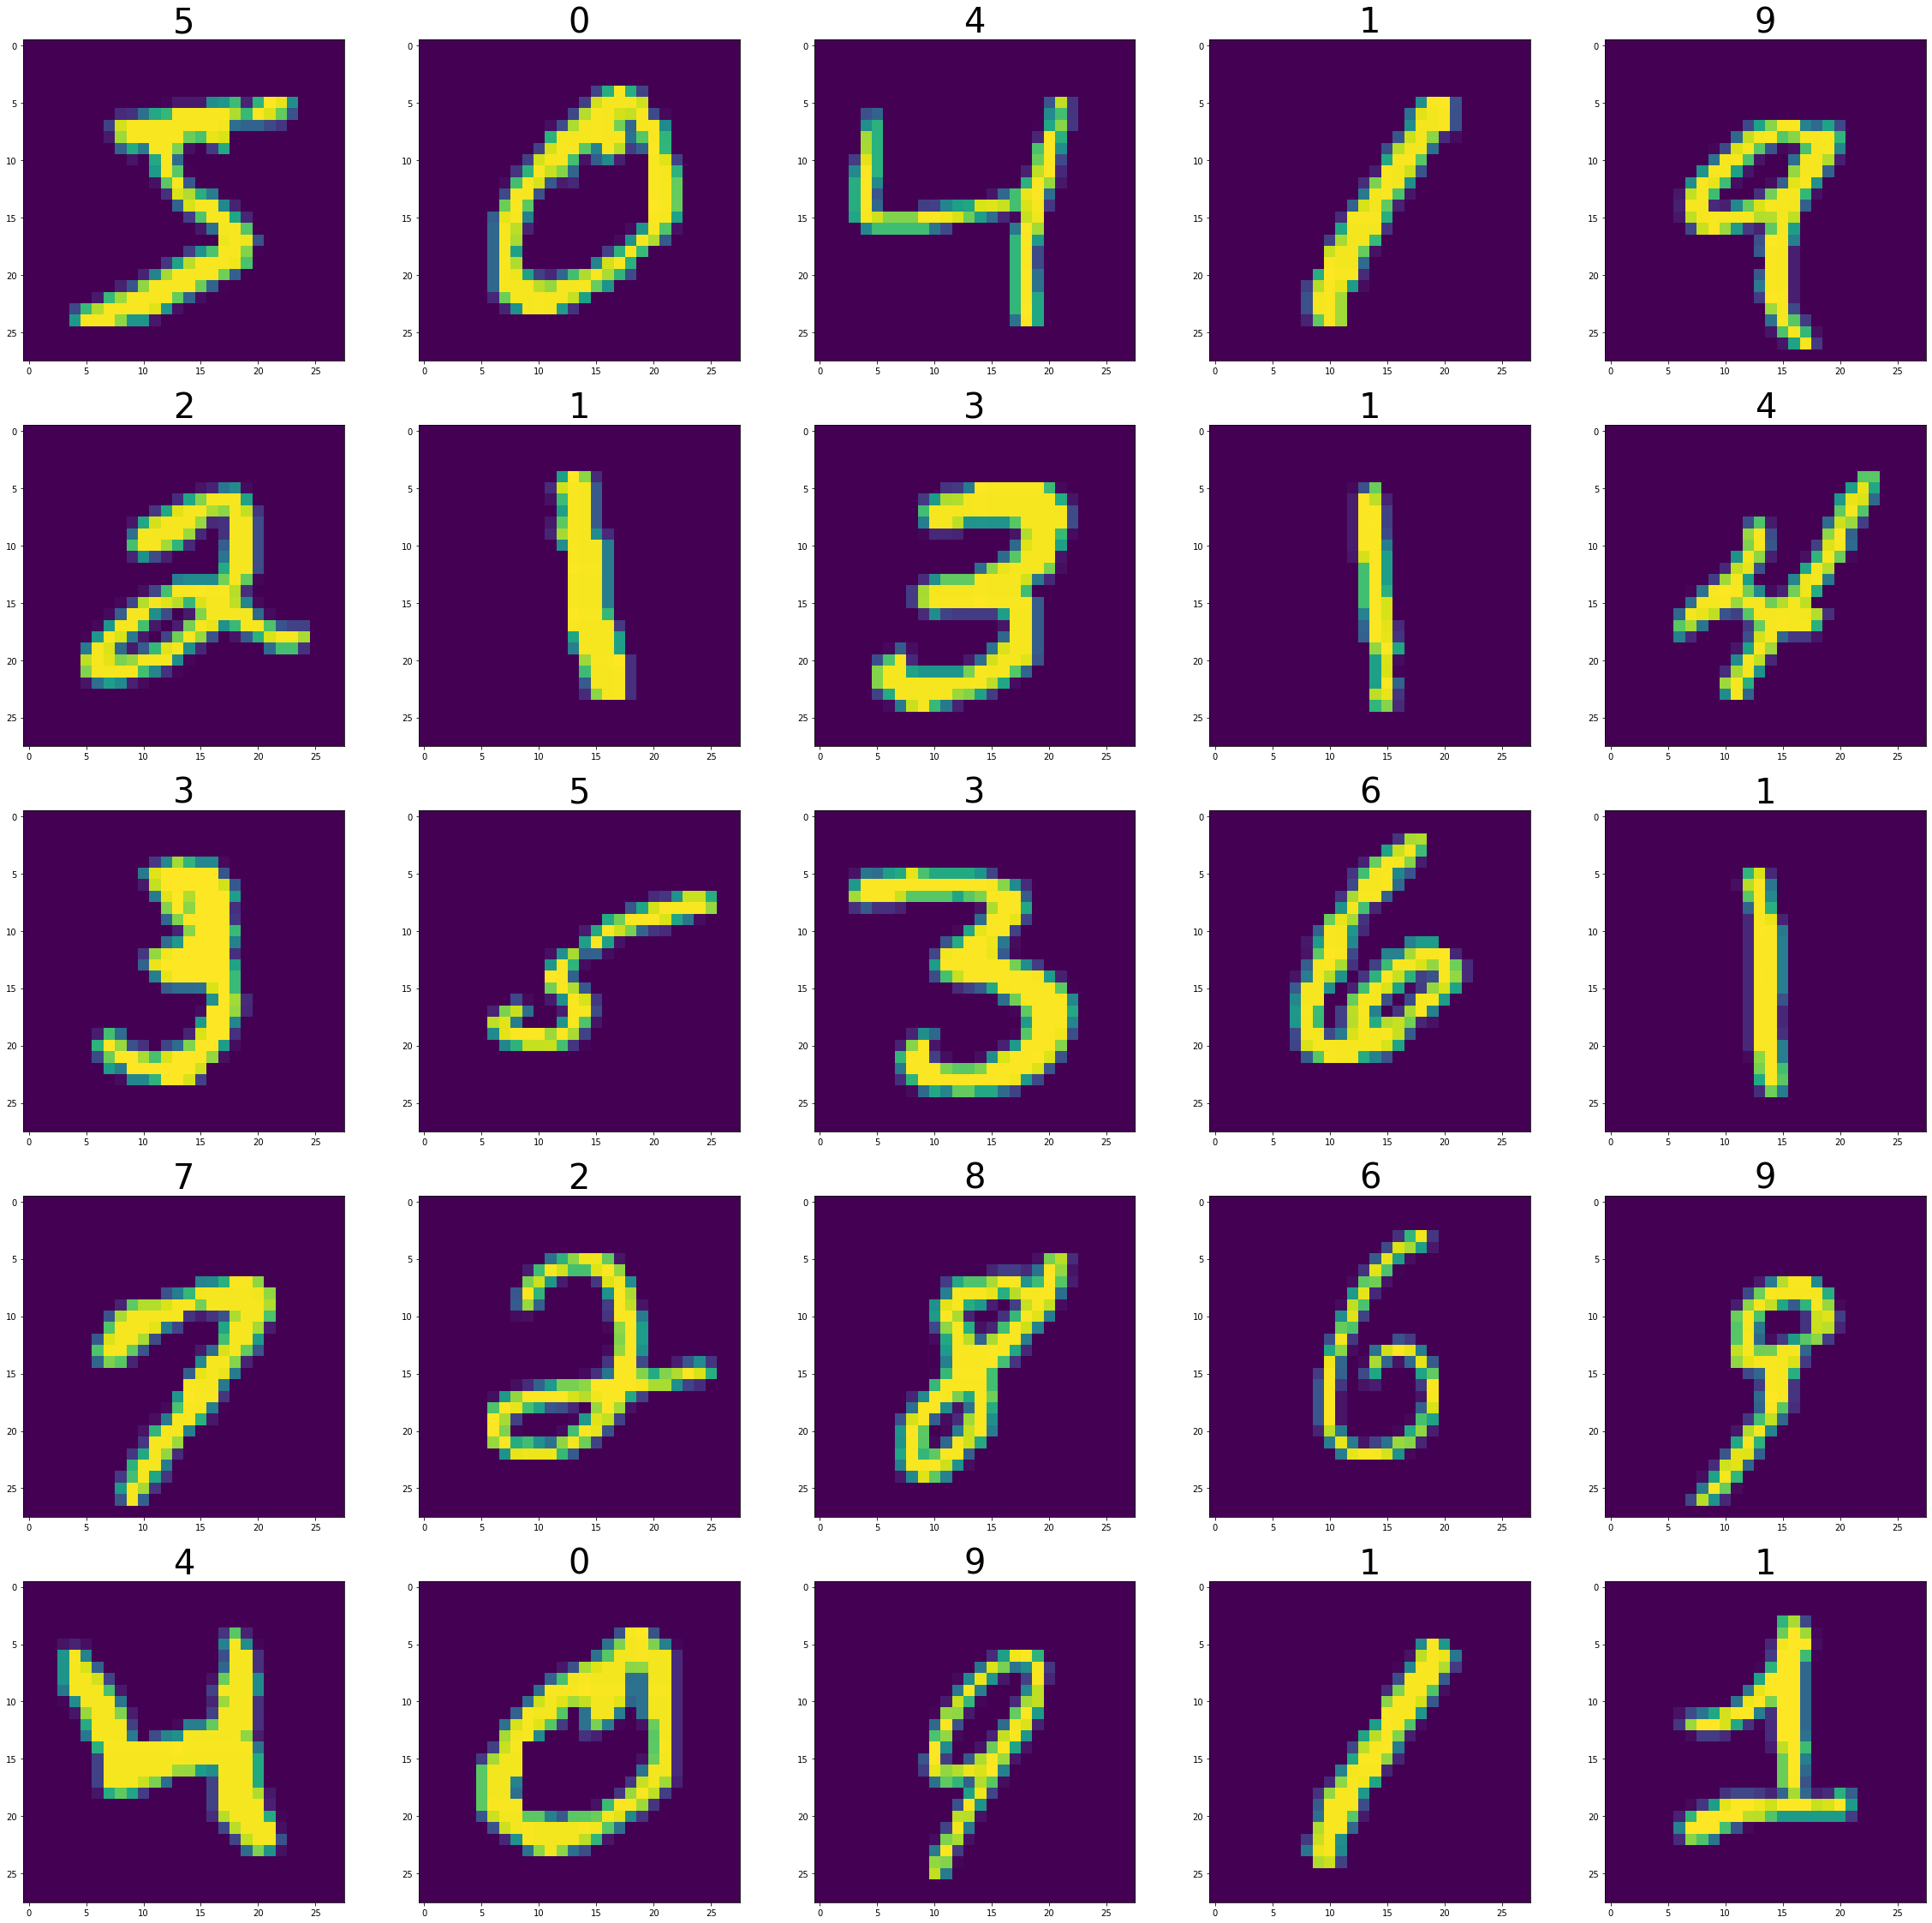

In [4]:
plt.figure(figsize=(40, 40))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(y_train[i],fontsize=40)
    plt.imshow(X_train[i])

plt.show()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
X_tr = X_train.reshape(-1,28,28,1)
X_te = X_test.reshape(-1,28,28,1)
X_tr = X_tr / 255
X_te = X_te / 255

In [7]:
print(X_tr.shape)
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
import tensorflow.keras.utils as utils

In [9]:
y_tr = utils.to_categorical(y_train, num_classes=10) # 独热编码
y_te = utils.to_categorical(y_test, num_classes=10)

In [10]:
model_checkpoint = ModelCheckpoint("lenet-5-tf.h5", monitor="loss", verbose=1, save_best_only=True)

In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), kernel_size=(5,5), filters=6, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))

model.add(Conv2D(kernel_size=(5,5), filters=16, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))

model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

print("trainning....")
model.fit(X_tr, y_tr, epochs=2, batch_size=32, callbacks=[model_checkpoint])



trainning....
Train on 60000 samples
Epoch 1/2
59904/60000 [============================>.] - ETA: 0s - loss: 0.1679 - accuracy: 0.9478
Epoch 00001: loss improved from inf to 0.16762, saving model to lenet-5-tf.h5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.1676 - accuracy: 0.9479
Epoch 2/2
59936/60000 [============================>.] - ETA: 0s - loss: 0.0594 - accuracy: 0.9816
Epoch 00002: loss improved from 0.16762 to 0.05947, saving model to lenet-5-tf.h5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0595 - accuracy: 0.9816


In [12]:
print("\n Testing")
model.load_weights("lenet-5-tf.h5")
loss, accuracy = model.evaluate(X_te, y_te)


 Testing
10000/10000 [==============================] - 1s 138us/sample - loss: 0.0448 - accuracy: 0.9847


In [13]:
print( loss)
print( accuracy)

0.044848384858109054
0.9847


In [14]:
X_te.shape

(10000, 28, 28, 1)

In [15]:
y_predict = model.predict(X_te)
y_predict[0]

array([1.9823591e-07, 1.8277724e-06, 3.8236399e-06, 4.3882563e-05,
       1.4474563e-07, 4.1564075e-08, 6.2123508e-11, 9.9994206e-01,
       5.3768656e-07, 7.3498049e-06], dtype=float32)

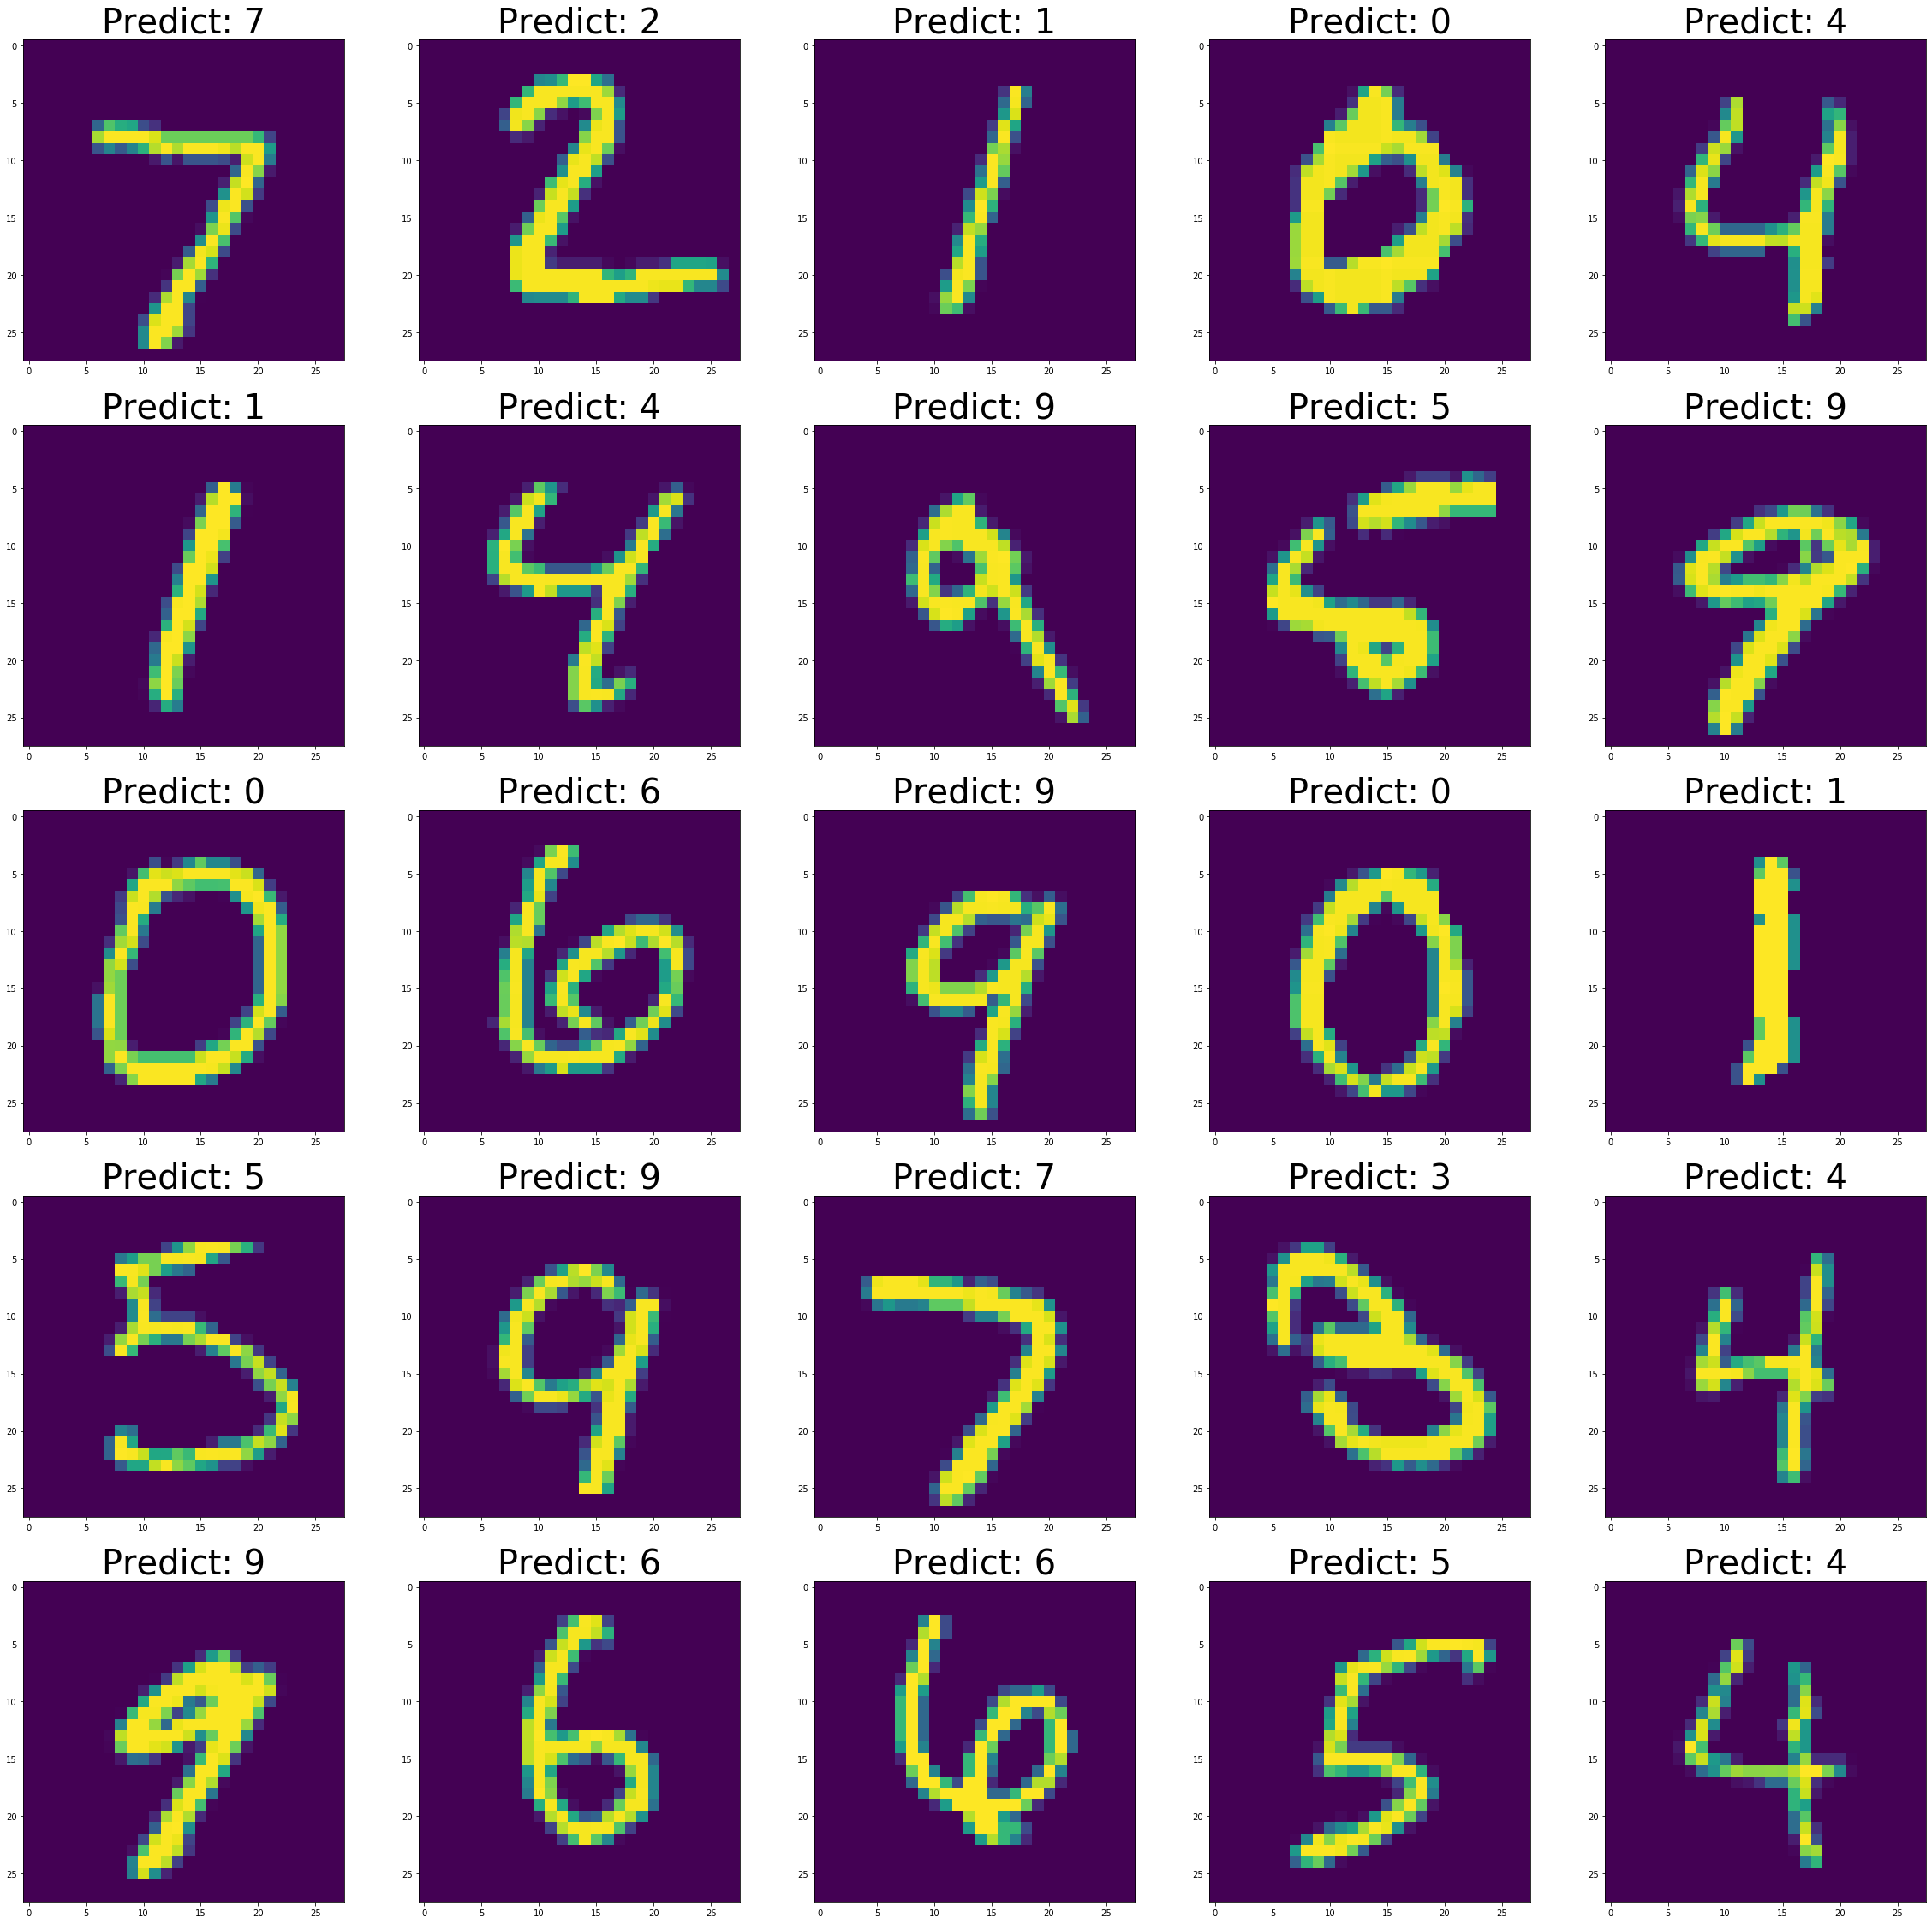

In [16]:
plt.figure(figsize=(40, 40))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title('Predict: '+ str(np.argmax(y_predict[i])),fontsize=40)
    plt.imshow(X_test[i])

plt.show()